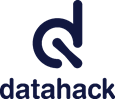

# <center>MODELOS DE SEGMENTACIÓN DE CONSUMIDORES</center>


Autor: [Santiago Moreno Gabaldón](https://www.linkedin.com/in/santiago-moreno-2a19a027/)

Los procesos de segmentación o clusterización son básicos en cualquier modelización de inteligencia artificial. Son modelos que no solo proporcionan una información extremadamente valiosa por sí mismos, sino que en muchos casos sirven como primer paso para la creación de otros modelos de machine learning.

Segmentar o clusterizar consiste en agrupar los datos en un número predeterminado de conjuntos de modo que cada conjunto sea lo más parecido internamente posible y se distinga lo más posible del resto.

En este ejemplo vamos a construir en primer lugar una segmentación de clientes y después a analizar los resultados. Esta segunda parte es la que se conoce como interpretabilidad o caracterización del clúster y es tan importante o más que la segunda.

Vamos a utilizar un dataset de la página web de [kaggle](https://www.kaggle.com/)

En la información relativa a este dataset se lee:

"The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. "

Un FMCG es un'Fast Moving Consumer Goods', es decir, a los bienes de consumo de alta rotación, o lo que es lo mismo, a los productos que tienen una vida útil corta. La información asociadal dataset es la siguiente, donde se ven las columnas, sus valores y sus significados:

Variable	Data type	Range	Description	
ID	numerical	Integer	Shows a unique identificator of a customer.	
				
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.	
		0	male	
		1	female	
				
Marital status	categorical	{0,1}	Marital status of a customer.	
		0	single	
		1	non-single (divorced / separated / married / widowed)	
				
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset	
		18	Min value (the lowest age observed in the dataset)	
		76	Max value (the highest age observed in the dataset)	
				
Education	categorical	{0,1,2,3}	Level of education of the customer	
		0	other / unknown	
		1	high school	
		2	university	
		3	graduate school	
				
Income	numerical	Real	Self-reported annual income in US dollars of the customer.	
		35832	Min value (the lowest income observed in the dataset)	
		309364	Max value (the highest income observed in the dataset)	
				
Occupation	categorical	{0,1,2}	Category of occupation of the customer.	
		0	unemployed / unskilled	
		1	skilled employee / official	
		2	management / self-employed / highly qualified employee / officer	
				
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.	
		0	small city	
		1	mid-sized city	
		2	big city	
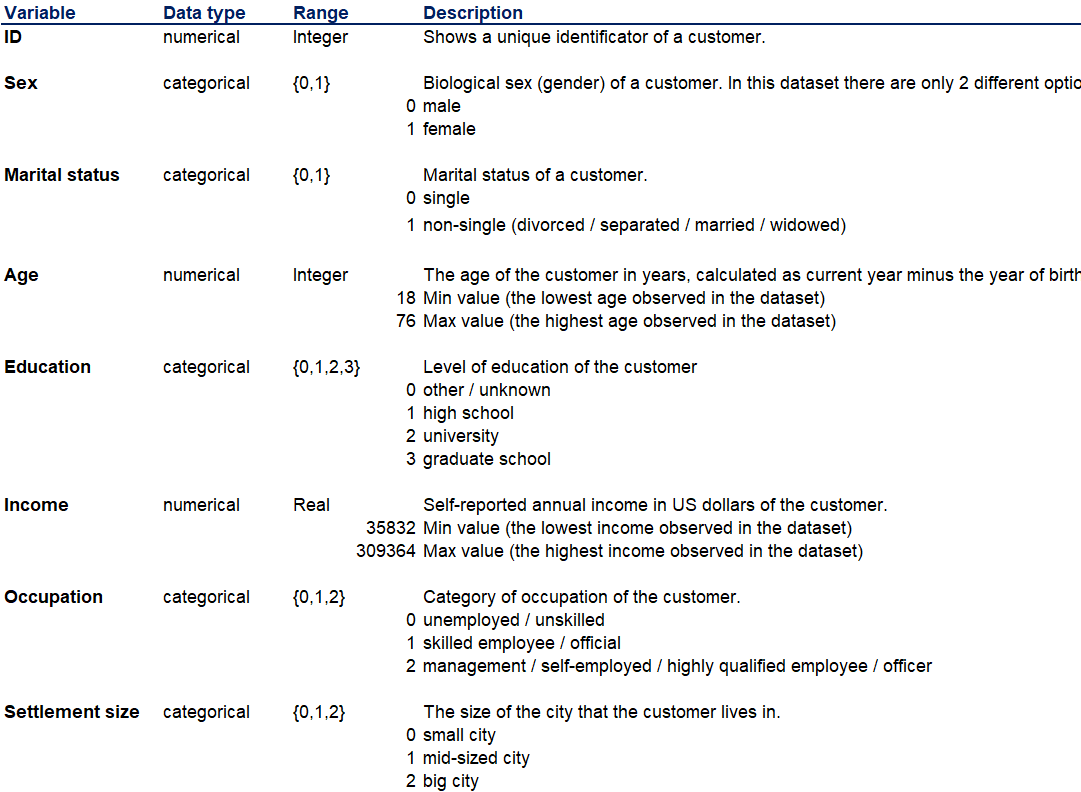

La idea es intentar segmentar los consumidores de FMCG del mejor modo posible. Importemos librerías y carguemos archivos:

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px


plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [183]:
ruta="D:\\J\\Big data\\DATAHACK\\PYTHON\\006-_Caso_segmentacion\FMCG\\"

ruta="D:\\0001_11_2016_PERSONAL\\datahack\\0006_Prácticas_master_junio\\"
ruta_linux='/home/user/Datahack/Datos_Segmentacion/'
archivo="segmentation data.csv"

In [184]:
df=pd.read_csv(ruta+archivo,sep=",")
#df=pd.read_csv(ruta_linux+archivo,sep=",")

Veamos los datos:

In [185]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## PRETRATAMIENTO DE LOS DATOS

Comprobamos tipos así como si hubiera datos nulos:

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Es un dataframe ya preparado: no tiene ningún registro nulo y son todos de tipo entero. Se ve que hay un total de 2000 registros. Comprobemos sus parámetros estadísticos más relevantes:

In [187]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Las variables en análisis de datos se dividen fundamentalmente en dos tipos:

- Numéricas: Pueden tomar cualquier valor. Representan valores continuos, com ouna temperatura, una edad o unos ingresos;
- Categóricas: Toman valores discretos que representan categorías. Por ejemplo, perros/gatos, paga o no paga, etc..

En nuestro dataset de datos solamente tenemos dos variables numéricas de acuerdo con la descripción: La edad y los ingresos. También el id, pero este no es más que un identificador, una clave primaria para nombrar los registros.

Veamos cómo se distribuyen estas variables analizando sus distribuciones:


,count,mean,std,min,25%,50%,75%,max
Age,2000.0,35.909,11.719402,18.0,27.00,33.0,42.00,76.0
Income,2000.0,120954.419,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0


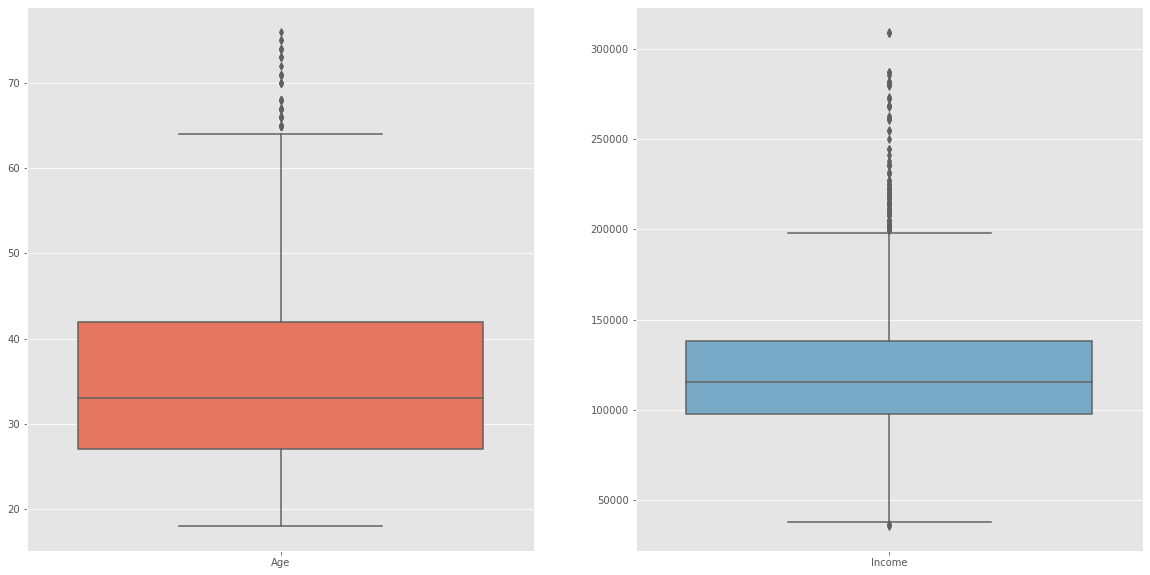

In [188]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(data=df[["Age"]],ax=axes[0],palette='Reds')
sns.boxplot(data=df[["Income"]],ax=axes[1],palette='Blues');
df[["Age","Income"]].describe().T

En resumen, se puedo decir:

- La edad se concentra entre 27 y 42 años. La media de edad es de 36 años, la mínima de 18 y la máxima 76. 
- Existen varios outliers con edades por encima de 65 años. Sin embargo, no parece que haya datos incorrectos en esta variable.
- Los ingresos mínimos son 35832 $ y se concentran entre 97.663 y 138.072. El valor máximo de ingresos es de 309.364
- Existen outliers tanto por exceso como alguno por defecto, pero no parecen valores anormalmente altos o bajos.

Así, damos por válidos los valores. Favorece a la larga el agrupar las columnas por tipos. Normalmente, estos tres:

- Numéricas;
- Identidades;
- Categóricas.

In [189]:
numericas=["Age","Income"]
Ids=["ID"]
categoricas=[s for s in df.columns if (s not in numericas) and (s not in Ids)]

In [190]:
print(numericas)
print(Ids)
print(categoricas)

['Age', 'Income']
['ID']
['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']


## TRATAMIENTO DE CATEGÓRICAS.

Las variables categóricas se suelen tratar de diferentes maneras. La más habitual es la denominada OneHotEncoder. Esto consiste en crear una variable por cada categoría que indique con un 1 la presencia y un 0 la ausencia de esa categoría.

Hay diferentes formas de hacerlo con pyhton. Vamos a verlo con pandas de una forma sencilla para ver el resultado.

Vamos a ir viendo las distintas categorías asociadas a cada variable categórica.

In [191]:
for col in categoricas:
    print(df[col].value_counts())

0    1086
1     914
Name: Sex, dtype: int64
0    1007
1     993
Name: Marital status, dtype: int64
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64
1    1113
0     633
2     254
Name: Occupation, dtype: int64
0    989
1    544
2    467
Name: Settlement size, dtype: int64


Las variables binarias como Sex o Marital Status no necesitan ningún tipo de tratamiento, pues ya toman directamente dos valores.

Vamos, por tanto,  a convertir las columnas Education, Occupation y Settlement
Empezamos por Education que tiene los siguientes valores:

- 0	other / unknown
- 1	high school
- 2	university
- 3	graduate school- 

Utilizamos la función get_dummies de pandas. Veámoslo:

In [192]:
df_education=pd.get_dummies(df["Education"])
df_education.merge(df["Education"],how="inner",left_index=True,right_index=True).head(10)

,0,1,2,3,Education
0,0,0,1,0,2
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,0,1
5,0,1,0,0,1
6,0,1,0,0,1
7,0,1,0,0,1
8,0,0,1,0,2
9,0,1,0,0,1


En el join anterior se ve cómo cuando education vale 2, la columna "2" tiene un 1 y el resto son "0". Cuando vale "1" es la columna "1" la que toma los valores 1. Además, eliminamos la primera columna porque es redudante. No se necesita. Está directamente correlacionada con las anteriores. Podríamos haber eliminado cualquiera, pero al estar contenidos los desconocidos en la 0, mejor nos quedamos con las 3 que sí conocemos. Aprovechamos para renombrar las nuevas columnas con sus categorías respectivas:

In [193]:
df_education.drop(columns=[0],inplace=True)
df_education.columns=["high_school","university","graduate_school"]
df_education.head()

,high_school,university,graduate_school
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Ahora repetimos el mismo procedimiento con Occupation:

-  0	unemployed / unskilled
-  1	skilled employee / official
-  2	management / self-employed / highly qualified employee / officer


Como en el caso anterior, vamos a mantener las columnas 1 y 2:

In [194]:
df_occupation=pd.get_dummies(df["Occupation"])
df_occupation.drop(columns=[0],inplace=True)
df_occupation.columns=["skilled_employee","management"]
df_occupation.head()


,skilled_employee,management
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


Finalmente tomamos la variable Settlement size eliminando la columna 2:

- 0	small city
- 1	mid-sized city
- 2	big city


En este caso eliminaremos la big city

In [195]:
df_settlement=pd.get_dummies(df["Settlement size"])
df_settlement.drop(columns=[2],inplace=True)
df_settlement.columns=["small_city","mid_sized_city"]
df_settlement.head()

,small_city,mid_sized_city
0,0,0
1,0,0
2,1,0
3,0,1
4,0,1


## TRATAMIENTO DE LAS VARIABLES NUMÉRICAS

Tras tratar las categóricas vamos a escalar las numéricas. En este caso solo hay dos numéricas: age e income. El motivo de escalar las variables numéricas es que, al utilizar kmeans que se basa en distancias, es importante que todas las varibles estén dentro del mismo rango de valores. Si una variable como "income" se mueve en el rango de decenas de miles y la edad solamente en miles, a la hora de considerar distancias entre puntos, esta diferencia de escala va a tener efectos poco deseables.

Para escalar los datos vamos a convertir estas variables en normales de media 0 y varianza 1.Esto se consigue sin más que restar la media a cada dato y dividir por la desviación típica. Sin embargo, sklearn lo hace ya directamente por nosOtros con Standard Scaler:

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
##PASO 1: CREAR UNA INSTANCIA DE NOMBRE "escalador"

escalador=StandardScaler()

In [198]:
##PASO 2: ENTRENAR EL ESCALADOR SOBRE LA SELECCIÓN DE VARIABLES NUMÉRICAS CON .fit. REUTILIZAMOS LA LISTA CON NUMERICAS

escalador.fit(df[numericas])

StandardScaler()

In [199]:
numericas

['Age', 'Income']

In [200]:
## PASO 3: TRANSFORMAMOS EL DF Y VEMOS QUÉ NOS DEVUELVE. LO METEMOS EN UNA VARIABLE DE NOMBRE "array_num"

array_num=escalador.transform(df[numericas])
array_num

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

De nuevo sklearn dentro de su filosofía de encadenar procesos en pipelines nos devuelve un array y no un dataframe. En este caso, vamos a convertirlo en dataframe ccon los nombres de las columnas correspondientes: ['Age_esc', 'Income_esc']

In [201]:
df_num=pd.DataFrame(array_num,columns=['Age_esc', 'Income_esc'])
df_num.head()

,Age_esc,Income_esc
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


Veamos ahora si, en efecto, se ajustan a una normal 0,1 como esperábamos:

In [202]:
df_num.describe()

,Age_esc,Income_esc
count,2.000000e+03,2.000000e+03
mean,1.180722e-16,6.605827e-17
std,1.000250e+00,1.000250e+00
min,-1.528532e+00,-2.234225e+00
25%,-7.603825e-01,-6.113281e-01
50%,-2.482829e-01,-1.418903e-01
75%,5.198664e-01,4.492952e-01
max,3.421764e+00,4.945225e+00


Veamos el gráfico escalado:

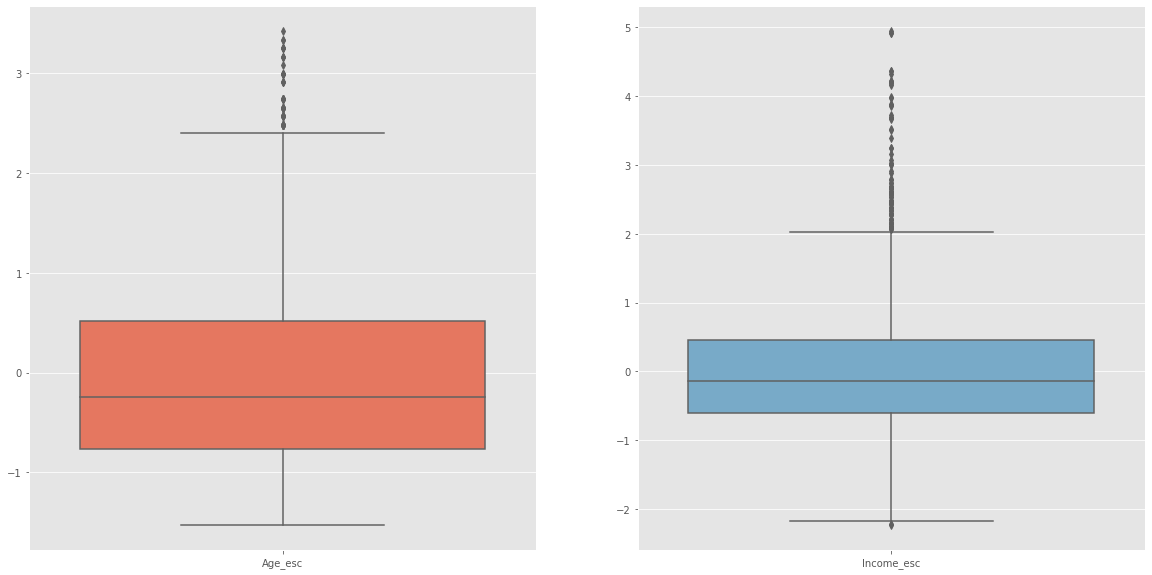

In [203]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(data=df_num[["Age_esc"]],ax=axes[0],palette='Reds')
sns.boxplot(data=df_num[["Income_esc"]],ax=axes[1],palette='Blues');

Se aprecia cómo los valores están entre -2 y 5. Todos los valores son órdenes de magnitud similares.

En resumen, tenemos:

- El df original del que querremos recuperar el ID, el sexo y el estado civil;
- Un df con las variables numéricas escaladas (df_num)
- Tres dfs adicionales con el "encoding" de las categóricas: df_settlement,df_occupation y df_education

Solo queda fusionar los distintos dfs en uno solo y entrenar nuestro algoritmo. Veamos cómo hacerlo:

In [204]:
### PASO 1: CREAMOS UN DF A PARTIR DEL ORIGINAL SOLO CON LA VARIABLES ID SEX Y MARITAL STATUS.

df_parcial=df[["ID","Sex","Marital status"]]

In [205]:
### PASO 2: CREAMOS UNA LISTA CON LOS DFS A FUSIONAR:

lista_dfs=[df_parcial, df_num, df_settlement,df_occupation,df_education ]

In [206]:
###PASO 3: CREAMOS UN DF DE NOMBRE df_train CON pd.concat y axis =1, ya que vamos a añadir por columnas

In [207]:
df_train=pd.concat(lista_dfs,axis=1)
df_train.head()

,ID,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
0,100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0
1,100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0
2,100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0
3,100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0
4,100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0


De cara al entrenamiento, tenemos que quitar el ID. No se pueden utilizar indicadores para los algoritmos de machine learning. No obstante, no queremos perderlo, así que lo convertimos en el índice del dataframe:

In [208]:

df_train.index=df_train["ID"]
df_train.drop(columns=["ID"],inplace=True)
df_train.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
ID,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0


Y ya estamos listos para entrenar.

## ENTRENAMIENTO ALGORITMO KMEANS.

Para el algoritmo del KMEANS, se necesita especificar el número de clústeres con el que queremos quedarnos. Es lo que se conoce como clúster no jerárquico.

En primer lugar, vamos a aprender a entrenar un kmeans con 4 clústeres. Después veremos cómo se puede intentar ver cuál es el mejor número posible de clústeres.

In [209]:
### PASO 1: IMPORTAR LA CLASE KMEANS DE SKLEARN

from sklearn.cluster import KMeans

In [210]:
### PASO 2: CREAMOS UNA INSTANCIA DE KMEANS FIJANDO EL NÚMERO DE CLÚSTERES Y EL PARÁMETRO RANDOM STATE

modelo_cluster=KMeans(n_clusters=4,random_state=42)

Uno de los aspectos exigidos en machine learning es la replicabilidad de resultados, es decir, que si se repite la ejecución, se obtengan los mismos resultados. En muchos algoritmos como el kmeans, se inicializan ciertos parámetros aleatoriamente y el parámetro random_state trata precisamente de que en diferentes inicializaciones, estos parámetros no varíen.

In [211]:
### PASO 3: ENTRENAMOS EL MODELO CONTRA NUESTRO DATASET

modelo_cluster.fit(df_train)

KMeans(n_clusters=4, random_state=42)

Tras entrenar el modelo podemos intentar ver distintas propiedades del algoritmo:

- Centroides: son el centro de gravedad de cada uno de los 4 clústeres que se han formado. Los sucesivos clientes se identificarán con uno u otro clúster de acuerdo con el cdg que esté más cerca.

- Inercia: Se entiende por inercia la suma de las distancias entre los puntos a los centroides. En la documentación de sklearn se indica la expresión:


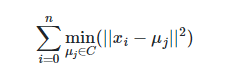

En este caso, el mínimo indica que lo que se intenta es minimizar esas distancias. Este valor es importante porque es la base para el llamado método del codo que comentaremos seguidamente. De momento, veamos cómo extraer el clúster al que pertenece cada muestra, los centroides y la inercia

In [212]:
### PASO 4: Hacemos una prediccion con .predict sober el dataframe de entrenamiento:

modelo_cluster.predict(df_train)

array([1, 0, 2, ..., 2, 2, 2])

Vemos como nos devuelve un array de numpy. Lo podemos anadir directamente como columna:

In [213]:
df_train['cluster']=modelo_cluster.predict(df_train)
df_train.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster
ID,,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0,1
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0,0
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0,2
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0,3
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0,1


Hechas las predicciones podemos consultar los centroides:

In [214]:
modelo_cluster.cluster_centers_

array([[ 4.85448196e-01,  5.64610012e-01, -5.06220531e-01,
        -1.05031347e-01,  3.91152503e-01,  3.43422584e-01,
         9.54598370e-01,  1.74621653e-02,  8.06752037e-01,
         4.65657742e-03,  5.82072177e-03],
       [ 4.17127072e-01,  4.69613260e-01,  1.61809827e+00,
         3.73251215e-01,  3.89502762e-01,  3.61878453e-01,
         6.04972376e-01,  1.10497238e-01,  2.90055249e-01,
         6.40883978e-01,  6.90607735e-02],
       [ 5.86826347e-01,  4.91017964e-01, -3.70600782e-01,
        -9.73491449e-01,  9.84031936e-01,  3.99201597e-03,
         1.11022302e-16,  9.98003992e-03,  7.90419162e-01,
         3.59281437e-02,  1.04083409e-17],
       [ 1.87050360e-01,  3.30935252e-01,  1.25046234e-01,
         1.59289282e+00,  6.83453237e-02,  4.17266187e-01,
         2.66187050e-01,  6.97841727e-01,  6.90647482e-01,
         1.33093525e-01,  2.15827338e-02]])

Cada uno de estos arrays es el centroide de cada uno de los clusteres. Podemos crear un dataframe con ellos para guardarlos:

In [215]:
df_centroides=pd.DataFrame(modelo_cluster.cluster_centers_,columns=[x for x in df_train.columns if x !='cluster'],index=['cluster %s' %x for x in range(0,4)])
df_centroides.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school
cluster 0,0.485448,0.564610,-0.506221,-0.105031,0.391153,0.343423,9.545984e-01,0.017462,0.806752,0.004657,5.820722e-03
cluster 1,0.417127,0.469613,1.618098,0.373251,0.389503,0.361878,6.049724e-01,0.110497,0.290055,0.640884,6.906077e-02
cluster 2,0.586826,0.491018,-0.370601,-0.973491,0.984032,0.003992,1.110223e-16,0.009980,0.790419,0.035928,1.040834e-17
cluster 3,0.187050,0.330935,0.125046,1.592893,0.068345,0.417266,2.661871e-01,0.697842,0.690647,0.133094,2.158273e-02


Se ve cómo las coordenadas del centroide no se corresponden en las categóricas con los valores de 0 o 1 esperados. Este es uno de los problemas que nos vamos a encontrar al utilizar kmeans: los centroides no son puntos del cluster y no tienen por que tomar los valores de las categoricas esperados, sino cualquier valor entre 0 y 1. 

Existen variaciones sobre el kmeans como es el kmedians que en lugar de tomar el centro de gravedad y la media se basa en la mediana. Tiene la ventaja de que los centroides sí son puntos del clúster y, sobre todo, es más robusto frente a outliers.

Veamos la inercia:

In [216]:
modelo_cluster.inertia_

3949.988266166703

Este es un valor que dice poco. La inercia va a ir disminuyendo a medida que se aumente el numero de clusters. Esto es fácil de entender, pues en el limite, es decir, con tantos clusteres como muestras, la inercia final será nula, ya que cada punto coincidirá con su propio centroide. Esto, naturalmente, no es operativo y se requiere definir algún método de cara a limitar ese descenso de la inercia. 



## MÉTODO DEL CODO: ELECCIÓN DEL NÚMERO DE CLÚSTERES

El método del codo es el primer método y el más sencillo y habitual de los que vamos a ver para determinar el número de clústeres.

En realidad, no proporciona un número como tal, sino que se grafica una curva de la inercia frente al número de clústeres y se escoge el número observando cuándo el aumento en un cluster no implica una bajada significativa de la inercia. Esto se ve como un codo en la curva y de ahi el nombre del metodo.


La función siguiente permite pintar el citado codo:

In [217]:
def elbow_plot(df2_k, columns_to_k, range_n_clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10], fig_size=(15, 8)):
    """
    A function to plot the elbow.inertia plot for clustering,
    Args: a dataframe, list with columns of the independent variables to cluster, a list with the number of cluters to compare
    and the figsize.
    Returns. A plot of the elbow function
    """

    sse = {}
    plt.figure(figsize=fig_size)
    for k in range_n_clusters:
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2_k[columns_to_k])

        # df2_kmeans["clusters"] = kmeans.labels_

        # print(df2_kmeans["clusters"])

        sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

    # plt.figure()

    df_I = pd.DataFrame.from_dict(sse, orient='index', columns=["Inertia"]).reset_index()
    df_I.columns = ["Number of clusters", "Inertia"]

    df_I.sort_values(by="Inertia", ascending=False, inplace=True)

    fig = px.line(df_I, y="Inertia", x="Number of clusters", title='Optimal number of clusters')
    fig.show()


In [218]:
#### Tenemos que quitar la columna cluster que hemos anadido antes para pintar el codo:

elbow_plot(df_train,columns_to_k=[x for x in df_train.columns if x != "cluster"],range_n_clusters=np.arange(2,21));
pass

<Figure size 1080x576 with 0 Axes>

Este es un muy buen ejemplo de los defectos del método del codo. No se ve un codo claro, sino que la curva es bastante suave. En apariencia, parece que con 5 clusters primero y con 10 despues hay cierta inflexión, pero no está muy claro

## ALTERNATIVA: MÉTODO DEL SILHOUETTE (SOFT CLUSTERING)

El método del silhouette calcula para cada muestra un valor entre -1 y 1. Valores positivos signfican que la muestra esta bien clasificada dentro de su cluster y negativos que no lo está, es decir, podría pertenecer a otro clúster perfectamente.

El método del silhouette calcula para cada muestra la media de la distancia intracluster (a), es decir, contra todas las muestras de su cluster y la extra cluster contra el cluster más cercano (b). Después, se divide entre la mayor de ellas y se obtiene el valor:

coeficiente=(b-a)/max(b,a)

si a, distancia intracluster es mayor, el coeficiente dará negativo. Este método tiene dos grandes ventajas:

- Permite dar un grado de clasificacion de cada muestra, es decir, podemos saber qué muestras están mejor clasificadas que otras (soft clustering);
- Obtiene un valor para cada cluster como la media del silhouette de cada cluster y un valor para el total, con lo que se pueden comparar directamente los clústeres que se formen.

Sin embargo, tiene una gran desventaja. Para poder calcular las distancias entre las diferentes muestras, se tiene que calcular la matriz de distancias. Esta es una matriz simétrica que contiene las distancias de cada muestra contra todas las demás. Este proceso requiere mucho tiempo de computación y, a medida que el número de muestras crece, se hace inviable por temas de tiempo de computo y también de memoria.

No obstante, siempre que sea factible su calculo se recomienda. Veamos como se hace.




In [219]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

Veamos para el caso de 4 clusteres qué valor se obtiene. Como ya hemos visto, nos va a venir bien tener una lista que no considere a la columna cluster:

In [220]:
variables=[x for x in df_train.columns if x != "cluster"]

silhouette_score(df_train[variables],labels=df_train["cluster"])


0.2103632525340283

Podemos ver para cada cluster formado el valor del silhouette con los siguientes pasos:

In [221]:
###Caclculamos el silhouette y lo metemos en una columna de nombre Silueta_4:
df_train["Silueta_4"]=silhouette_samples(df_train[variables],labels=df_train["cluster"])
df_train[["cluster","Silueta_4"]].groupby("cluster").mean()

,Silueta_4
cluster,
0,0.200652
1,0.169238
2,0.294989
3,0.141414


Podemos también ver si existen muestras negativas, es decir, mal clasificadas:

In [222]:
###CALCULA EL NÚMERO DE MUESTRAS QUE TIENEN SILUETA NEGATIVA:
df_train[df_train["Silueta_4"]<0].shape



(98, 13)

In [223]:
##CALCULA LA MUESTRA PEOR CLASIFICADA. PARA ELLO, PUEDES BUSCAR EL VALOR MÍNIMO DE LA COLUMNA Silueta_4
print("Muestra peor clasificada:")
df_train[df_train["Silueta_4"]==np.min(df_train["Silueta_4"])]

Muestra peor clasificada:


,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster,Silueta_4
ID,,,,,,,,,,,,,
100001993,1,0,1.288016,-0.521805,1,0,0,0,1,0,0,1,-0.120043


In [224]:
##CALCULA LA MUESTRA PEOR CLASIFICADA. PARA ELLO, PUEDES BUSCAR EL VALOR MÁXIMO DE LA COLUMNA Silueta_4
print("Muestra mejor clasificada:")
df_train[df_train["Silueta_4"]==np.max(df_train["Silueta_4"])]

Muestra mejor clasificada:


,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster,Silueta_4
ID,,,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0,1,0.413578


## CÁLCULO DEL NÚMERO DE CLUSTERES

Vamos a hacer un bucle que calcule el silhouette para el número de clústeres entre 2 y 25:

In [225]:
## VAMOS A CREAR UN DICCIONARIO valor_silhouette DONDE POR CLAVE VAMOS A METER EL NÚMERO DE CLÚSTERES Y VALOR EL SHILOUETTE ASOCIADO



valor_silhouette={}
for nclusters in np.arange(2,25):
    ##Definimios el número de clústeres:
    print("Cluster %s" %nclusters)
    cluster=KMeans(n_clusters=nclusters,random_state=42)
    cluster.fit(df_train[variables])
    valor_silhouette[nclusters]=silhouette_score(df_train[variables],labels=cluster.predict(df_train[variables]))
    print("####################################")
    
    

Cluster 2
####################################
Cluster 3
####################################
Cluster 4
####################################
Cluster 5
####################################
Cluster 6
####################################
Cluster 7
####################################
Cluster 8
####################################
Cluster 9
####################################
Cluster 10
####################################
Cluster 11
####################################
Cluster 12
####################################
Cluster 13
####################################
Cluster 14
####################################
Cluster 15
####################################
Cluster 16
####################################
Cluster 17
####################################
Cluster 18
####################################
Cluster 19
####################################
Cluster 20
####################################
Cluster 21
####################################
Cluster 22
####################################


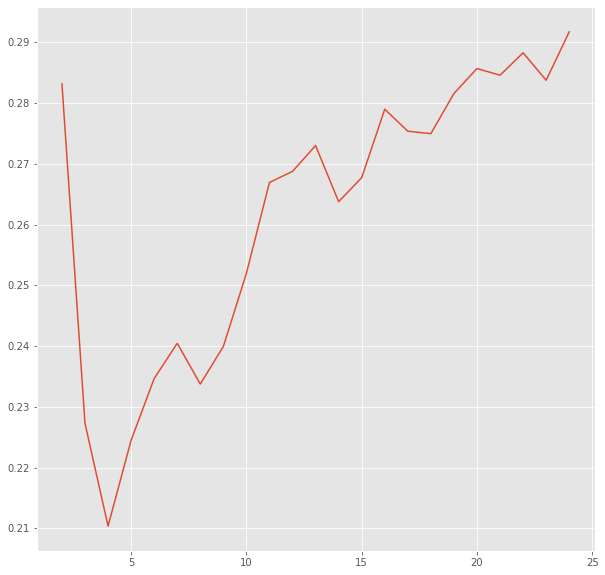

In [226]:
### PINTEMOS EN UNA GRÁFICA DE LOS DIFERENTES SILHOUETTES, VAMOS A VER LOS DISTINTOS VALORES

plt.figure(figsize=(10,10))
sns.lineplot(x=list(valor_silhouette.keys()),y=list(valor_silhouette.values()));

En la gráfica anterior se ve cómo entre 11 y 18 estaría en 0,27 y con 19 se llega al máximo con casi 0.29. En clústering las decisiones suelen tomarse en muchos casos con un criterio de negocio que se adapte mejor a las necesidades específicas en cada caso. No obstante, el conocer el valor asociado del silhouette siempre proporciona un valor adicional. Asimismo, en machine learning existe el principio de que, a igualdad de resultados, siempre intentar la solución más sencilla. Siempre será más fácil analizar una segmentación con pocos clústeres que con muchos, con lo que en este caso, podemos tomar 19 como valor final. 



## CARACTERIZACIÓN DE LOS CLÚSTERES

El aspecto final de las segmentaciones es la caracterización de los clústeres obtenidos, o dicho de otra manera, entender el porqué están teniendo lugar las separaciones en cada uno de los clústeres. 



### CARACTERIZACIÓN ESTADÍSTICA

El primer modo de caracterizar un clúster es analizar los diferentes estadísticos en cada uno de ellos para entender qué valores se están obteniendo en cada uno. Se puede también considerar las coordenadas del centroide como punto de análisis. Sin embargo, como ya se ha indicado, el centroide no solo no es un punto del clúster sino que además, proporciona un valor continuo para las variables categóricas diferente de los que realmente toman los datos.

Por este motivo, en la caracterización estadística, se van a analizar por separado las varialbes continuas de las discretas.

#### ANÁLISIS DE LAS VARIABLES NUMÉRICAS

Las variables numéricas se estudian con los estadísticos habituales: media, cuartiles, etc.. No se puede pasar por alto el detalle de que las variables están escaladas, con lo que antes de calcular los estadísticos se ha de proceder a desescalar las variables.

Para comenzar el proceso, añadamos la columna de clúster de 19 clústeres y su valor de silhouette asociado

In [227]:
###RECORDAMOS EL CONTENIDO DE df_train CON .head()

df_train.head()

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster,Silueta_4
ID,,,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0,1,0.413578
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0,0,0.307288
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0,2,0.217094
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0,3,0.120029
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0,1,0.168728


In [228]:
##Eliminamos las columnas de cluster y silueta para el caso anterior
df_train.drop(columns=["cluster","Silueta_4"],inplace=True)


In [229]:
##Entrenamos el clúster con 19:

cluster_final=KMeans(n_clusters=19,random_state=42)
cluster_final.fit(df_train)

KMeans(n_clusters=19, random_state=42)

In [230]:
##Añadimos la predicción de cluster a la columna cluster y el de silueta en la columna silueta:

df_train["cluster"]=cluster_final.predict(df_train)
df_train["silueta"]=silhouette_samples(df_train[variables],labels=df_train["cluster"])

In [231]:
df_train

,Sex,Marital status,Age_esc,Income_esc,small_city,mid_sized_city,skilled_employee,management,high_school,university,graduate_school,cluster,silueta
ID,,,,,,,,,,,,,
100000001,0,0,2.653614,0.097524,0,0,1,0,0,1,0,0,0.200803
100000002,1,1,-1.187132,0.782654,0,0,1,0,1,0,0,7,-0.066975
100000003,0,0,1.117316,-0.833202,1,0,0,0,1,0,0,3,0.374801
100000004,0,0,0.775916,1.328386,0,1,1,0,1,0,0,4,0.225535
100000005,0,0,1.458716,0.736932,0,1,1,0,1,0,0,4,0.247083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100001996,1,0,0.946616,0.067471,1,0,0,0,1,0,0,14,0.113276
100001997,1,1,-0.760382,-0.084265,1,0,1,0,1,0,0,1,0.474341
100001998,0,0,-0.418983,-0.906957,1,0,0,0,0,0,0,16,0.428810


Para caracterizar lso clústeres no nos vale nuestro df de entrenamiento, puesto que las variables están transformadas. Tenemos que llevar el valor de la predicción de clúster al df original. Lo más sencillo es mediante una operación de join:


In [232]:
##Recordemos nuestro df original con un .head()
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Vemos que el join ha de hacerse por el valor de ID, es decir, por el identificador del cliente. Es por esto que es fundamental en todo proceso de machine learning ser capaces de arrastrar el identificador durante todo el proceso. En este caso, hemos mantenido la trazabilidad haciendo que este indicador sea el índice del dataframe de train:

In [233]:
df=df.merge(df_train[["cluster","silueta"]],left_on="ID",right_index=True)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,silueta
0,100000001,0,0,67,2,124670,1,2,0,0.200803
1,100000002,1,1,22,1,150773,1,2,7,-0.066975
2,100000003,0,0,49,1,89210,0,0,3,0.374801
3,100000004,0,0,45,1,171565,1,1,4,0.225535
4,100000005,0,0,53,1,149031,1,1,4,0.247083


Vamos a ver el valor medio de las variables numéricas haciendo un groupby y calculando la media:

In [234]:
df[["Age","Income","cluster"]].groupby("cluster").mean()

,Age,Income
cluster,,
0,64.113208,118069.509434
1,28.502092,113093.426778
2,35.153846,153871.353846
3,40.175439,90572.938596
4,42.046512,128654.643411
5,48.225352,100881.295775
6,35.944444,219567.925926
7,30.281690,157014.633803
8,41.897143,128121.131429


Ya al ver los valores medios se distinguen clústeres que efectivamente tiene promedios de edades muy diferentes: El cluster 10 y el cluster 0 tienen valores de 64 años mientras que el 15 o 16 tienen 26.

Una forma también interesante de ver si hay diferencias entre los valores de cada clúster es intentar analizar los boxplots:

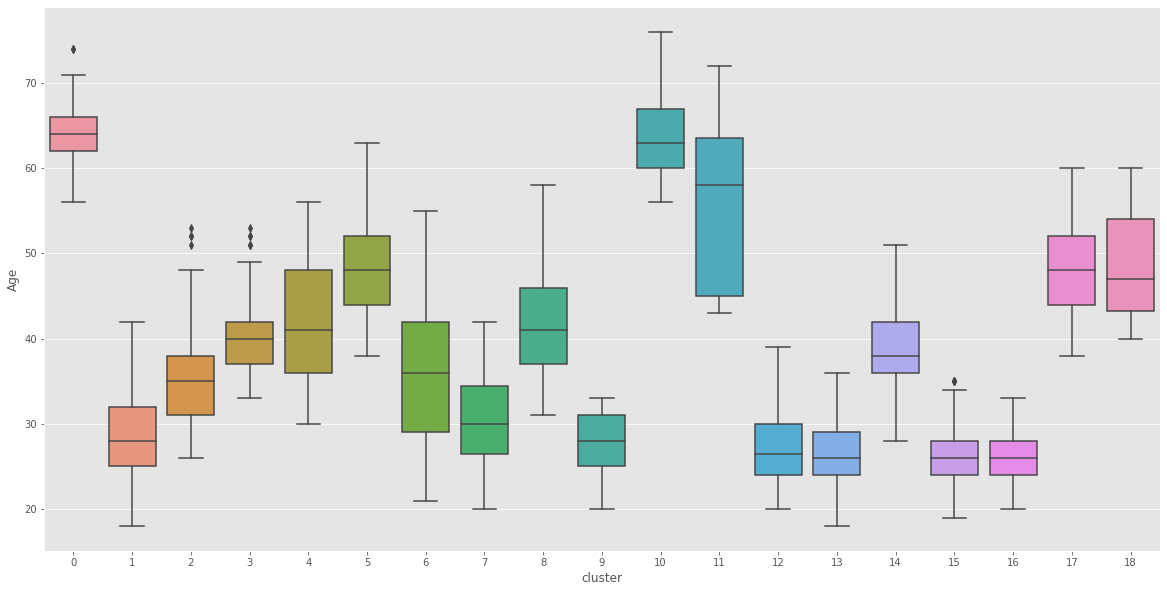

In [235]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["cluster"],y=df["Age"]);

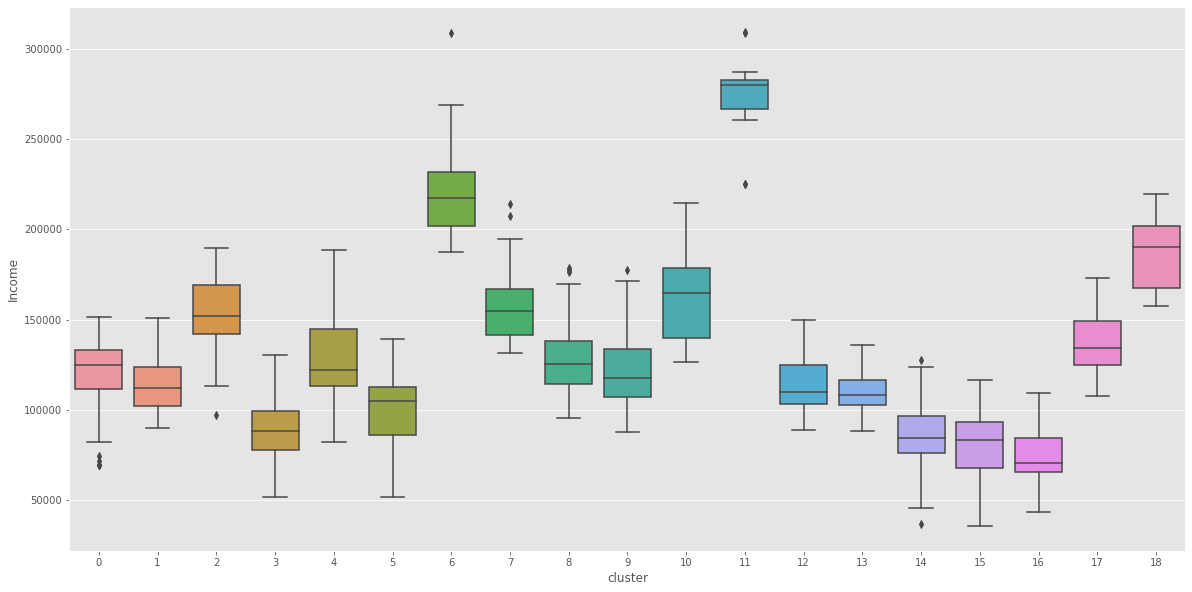

In [236]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["cluster"],y=df["Income"]);

Observamos cómo algunos clústeres como el 17 y el 18 que tenían edades similares, se diferencian claramente en los ingresos.
Creamos un df para caracterizarlo almacenando de momento las medias

In [237]:
df_carac=np.round(df[["Age","Income","cluster"]].groupby("cluster").mean(),2)
df_carac.head()

,Age,Income
cluster,,
0,64.11,118069.51
1,28.50,113093.43
2,35.15,153871.35
3,40.18,90572.94
4,42.05,128654.64


#### ANÁLISIS DE LAS VARIABLES CATEGÓRICAS

En el caso de las variables categóricas, se tomará la moda como valor a considerar.

Una forma de calular la moda es con la función de pandas pd.Series.mode en el groupby:

In [238]:
df_cat= df[categoricas+["cluster"]].groupby("cluster").agg(pd.Series.mode)
df_cat.head()

,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,
0,0,0,2,0,0
1,1,1,1,1,0
2,0,0,1,2,2
3,0,0,1,0,0
4,0,0,1,1,1


Naturalmente, los valores son los representativos de las categorías. Decir que Education=2 es la moda nos dice poco. Podemos crear un diccionario con las equivalencias para saber cuál es cada uno y sustituirlos. Lo hacemos también en una copia del df original.

In [239]:
###Diccionarios con las categorías

dicc_sex={0:"Hombre",1:"Mujer"}
dicc_Marital_status={0:"Soltero",1:"No soltero"}
dicc_education={0:"Otros",1:"Bachillerato",2:"Universidad",3:"Posgrado"}
dicc_Occupation={0:"Desempleado",1:"Empleado cualificado",2:"Puesto de gestión/autónomo/empleado de alta cualifiacion"}
dicc_Settlement_size={0:"Ciudad pequeña",1:"Ciudad media",2:"Gran ciudad"}

In [240]:
###Aplicamos los valores de los diccionarios para sustituir los valores
df_cat["Sex"]=df_cat["Sex"].apply(lambda x:dicc_sex[x])
df_cat["Marital status"]=df_cat["Marital status"].apply(lambda x:dicc_Marital_status[x])
df_cat["Education"]=df_cat["Education"].apply(lambda x:dicc_education[x])
df_cat["Occupation"]=df_cat["Occupation"].apply(lambda x:dicc_Occupation[x])
df_cat["Settlement size"]=df_cat["Settlement size"].apply(lambda x:dicc_Settlement_size[x])
##Copia del df original
df_explicado=df.copy()
df_explicado["Sex"]=df_explicado["Sex"].apply(lambda x:dicc_sex[x])
df_explicado["Marital status"]=df_explicado["Marital status"].apply(lambda x:dicc_Marital_status[x])
df_explicado["Education"]=df_explicado["Education"].apply(lambda x:dicc_education[x])
df_explicado["Occupation"]=df_explicado["Occupation"].apply(lambda x:dicc_Occupation[x])
df_explicado["Settlement size"]=df_explicado["Settlement size"].apply(lambda x:dicc_Settlement_size[x])



In [241]:
df_cat.head()

,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,
0,Hombre,Soltero,Universidad,Desempleado,Ciudad pequeña
1,Mujer,No soltero,Bachillerato,Empleado cualificado,Ciudad pequeña
2,Hombre,Soltero,Bachillerato,Puesto de gestión/autónomo/empleado de alta cu...,Gran ciudad
3,Hombre,Soltero,Bachillerato,Desempleado,Ciudad pequeña
4,Hombre,Soltero,Bachillerato,Empleado cualificado,Ciudad media


Con esta última función se ve mucho mejor cómo se caracteriza cada clúster. ASí, en el clúster 0 son mayoritarios los hombres, solteros desempleados con titulación universitaria y que viven en ciudades pequeñas.

Ahora, para terminar de caracterizar los clústeres por todas las variables, solo tenemos que unir ambos dataframes, el numérico y el categórico:

In [242]:
df_carac=df_carac.merge(df_cat,how="inner",left_index=True,right_index=True)
df_carac.head()

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,,,
0,64.11,118069.51,Hombre,Soltero,Universidad,Desempleado,Ciudad pequeña
1,28.50,113093.43,Mujer,No soltero,Bachillerato,Empleado cualificado,Ciudad pequeña
2,35.15,153871.35,Hombre,Soltero,Bachillerato,Puesto de gestión/autónomo/empleado de alta cu...,Gran ciudad
3,40.18,90572.94,Hombre,Soltero,Bachillerato,Desempleado,Ciudad pequeña
4,42.05,128654.64,Hombre,Soltero,Bachillerato,Empleado cualificado,Ciudad media


Ya tenemos la caracterización de cada uno de los clústeres. Podemos ver que el 2, por ejemplo, lo componen fundamentalmente hombre de 35 años con ingresos de 153000 $, solteros, con educación equivalente a bachillerato y puestos de gestión que viven en ciudades grandes

### CARACTERIZACIÓN MEDIANTE ÁRBOLES DE DECISIÓN

Los árboles de decisión son algoritmos que van buscando entre las variables, una por una y por un valor constante de una de ellas, separan el dataset de manera que se reduzca lo máximo posible el "desorden" existente. Naturalmente, los árboles pueden dar más de un corte por la misma o diferentes variables. Son estos cortes los que determinan uno de sus parámetros más importantes: la profundidad.

Como consecuencia de esto, es posible separar completamente un dataset con un árbol de decisión, es decir, conseguir una precisión del 100 % en el entrenamiento. Esto, que no es buena práctica en problemas de clasificación por temas de sobreajuste, permite entender entender cuánto aporta cada variable en términos relativos a "disminuir" este desorden, es decir, proporcionan un grado de importancia de cada variable.

En el caso de segmentación, podemos aprovechar esta propiedad para entender en qué variables se fijará en cada caso el árbol de decisión para separar cada uno de nuestros clústeres de los demás. Para hacer esto, tenemos que entrenar un árbol suficientemente profundo con la metodología de "one vs rest", es decir, tomamos una variable y las restantes las agrupamos en un único grupo. En resumen, transformamos nuestro problema de clasificación multiclase en un problema de clasificación binario.

Haciendo el procedimiento anterior 19 veces, tendremos un clasificador para cada uno de los clústeres.

Veamos cómo se entrena este árbol de decisión

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
#El parámetro max_depth va a regular el parámetro de la profundidad.
#Un valor de 1000 es una auténtica exageración, pero así nos aseguramos de que clasifica todo bien
arbol=DecisionTreeClassifier(max_depth=1000)

In [245]:
#Entrenasmo por ejemplo para el clúster 0.
#Montamos una lista con las variables que queremos que se entrene:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,silueta
0,100000001,0,0,67,2,124670,1,2,0,0.200803
1,100000002,1,1,22,1,150773,1,2,7,-0.066975
2,100000003,0,0,49,1,89210,0,0,3,0.374801
3,100000004,0,0,45,1,171565,1,1,4,0.225535
4,100000005,0,0,53,1,149031,1,1,4,0.247083


In [246]:
features=categoricas+numericas
features

['Sex',
 'Marital status',
 'Education',
 'Occupation',
 'Settlement size',
 'Age',
 'Income']

Llegados a este punto es posible que uno se pregunte por qué no se ha estandarizado el dataset. Asimismo, porqué las variables categóricas no se han separado en variables "dummies". El motivo es porque los árboles de decisión apenas necesitan preparación de los datos y trabajan perfectamente con variables numéricas y categóricas sin importar órdenes de magnitud.

Ahora tenemos que crear una variable objetivo que tome como valor 1 el clúster 0 y 0 los demas:


In [247]:
y_true=np.where(df["cluster"]==0,1,0)
y_true

array([1, 0, 0, ..., 0, 0, 0])

Ya tenemos todo lo necesario para entrenar. En sklearn, cualquier algoritmo se entrena con el método .fit:

In [248]:
arbol.fit(X=df[features],y=y_true)
arbol.score(X=df[features],y=y_true)

1.0

Vemos cómo el resultado del clasificador es 1, es decir, ha acertado el 100 % como pertenecientes al clúster 1. Ahora solo tenemos que preguntarle por la importancia de variables:

In [249]:
arbol.feature_importances_

array([0.01399778, 0.0816178 , 0.        , 0.        , 0.15349589,
       0.37271093, 0.37817761])

Devuelve un array con distintos valores cuya suma total es 1. Podemos de modo fácil construir un df con las columnas ya que se mantiene el orden:

In [250]:
df_importancia_var=pd.DataFrame(arbol.feature_importances_,index=features).T
df_importancia_var

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
0,0.013998,0.081618,0.0,0.0,0.153496,0.372711,0.378178


El árbol distinque a los del clúster 0 fundamentalmente por su edad, sus ingresos y el tipo de ciudad. Si retomamos el análisis estadístico podremos ver los valores que toman estas variables:

In [251]:
df_carac.loc[0:0,:]

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,,,
0,64.11,118069.51,Hombre,Soltero,Universidad,Desempleado,Ciudad pequeña


De acuerdo con esto, podríamos decir que el clúster 0 se caracteriza por gente de edad avanzada, con ingresos medios-bajos y que viven en ciudades pequeñas.

Podemos repetir el proceso para el resto de clústeres e ir añadiendo cada clúster a este dataframe:

In [252]:
##Vamos a ir copiando y pegando los distintos pasos:
for cluster in range(1,19): ##Vamos a ir iterando por los clústeres 1 a 20:
    arbol=DecisionTreeClassifier(max_depth=1000)
    y_true=np.where(df["cluster"]==cluster,1,0)
    arbol.fit(X=df[features],y=y_true)
    print("En el clúster %s se ha obtenido un score de:" %cluster)
    print(arbol.score(X=df[features],y=y_true))
    ###Recomendable en los bucles poner prints que nos digan por dónde vamos
    print("############################")
    df_imp=pd.DataFrame(arbol.feature_importances_,index=features).T
    df_imp.index=[cluster]
    df_importancia_var=pd.concat([df_importancia_var,df_imp],axis=0)

    
    

En el clúster 1 se ha obtenido un score de:
1.0
############################
En el clúster 2 se ha obtenido un score de:
1.0
############################
En el clúster 3 se ha obtenido un score de:
1.0
############################
En el clúster 4 se ha obtenido un score de:
1.0
############################
En el clúster 5 se ha obtenido un score de:
1.0
############################
En el clúster 6 se ha obtenido un score de:
1.0
############################
En el clúster 7 se ha obtenido un score de:
1.0
############################
En el clúster 8 se ha obtenido un score de:
1.0
############################
En el clúster 9 se ha obtenido un score de:
1.0
############################
En el clúster 10 se ha obtenido un score de:
1.0
############################
En el clúster 11 se ha obtenido un score de:
1.0
############################
En el clúster 12 se ha obtenido un score de:
1.0
############################
En el clúster 13 se ha obtenido un score de:
1.0
########################

In [253]:
df_importancia_var

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
0,0.013998,0.081618,0.000000,0.000000,0.153496,0.372711,0.378178
1,0.069914,0.169161,0.107922,0.325559,0.138737,0.077996,0.110711
2,0.019903,0.000000,0.113589,0.454203,0.018805,0.066036,0.327464
3,0.233223,0.013289,0.142552,0.120522,0.133732,0.311996,0.044686
4,0.009639,0.232234,0.132238,0.163661,0.184535,0.212997,0.064696
5,0.013997,0.031640,0.188310,0.437284,0.060581,0.204718,0.063471
6,0.025014,0.000000,0.405332,0.045678,0.000000,0.018636,0.505341
7,0.053390,0.143702,0.257641,0.131043,0.147172,0.071157,0.195895
8,0.021626,0.088140,0.119560,0.374811,0.160839,0.151539,0.083485
9,0.034919,0.000000,0.511650,0.365425,0.000000,0.012241,0.075765


Con estos dos dfs, df_importancia_var y df_carac podemos entender el tipo de cliente que tenemos en cada uno de las diferentes agrupaciones. Por ejemplo, tomemos el clúster 9 por su significativo valor en educación:

In [254]:
df_carac.loc[9:9,:]

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,,,
9,27.65,122332.09,Hombre,Soltero,Otros,Empleado cualificado,Gran ciudad


Vemos que la principal caractecterística es que está compuesto por "Otros". Veamos cuántos más están en esta situación:

In [255]:
df_carac[df_carac["Education"]=="Otros"]

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,,,
9,27.65,122332.09,Hombre,Soltero,Otros,Empleado cualificado,Gran ciudad
16,26.33,75369.82,Hombre,Soltero,Otros,Desempleado,Ciudad pequeña


Solamente el clúster 9 y el 16. Si vemos ahora las variables importantes de ambos

In [256]:
df_importancia_var.loc[[9,16],:]

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
9,0.034919,0.0,0.511650,0.365425,0.0,0.012241,0.075765
16,0.001260,0.0,0.274707,0.657264,0.0,0.000000,0.066769


En ambos casos, ocupación y educación suman más del 85 % de la importancia de las variables. Podemos por tanto afirmar que el clúster nos ha agrupado a la gente con "otros" como educación en dos clústeres donde además los ha clasificado según estén desempleados o tengan un empleo cualificado.

Hagamos algún análisis adicional, aunque ahora intentemos verlo de modo "inverso". Busquemos el clúster de mayro ingresos de promedio.

In [257]:
df_carac["Income"].argmax()

11

Se ve que en este caso el clúster 11. Si ahora nos vamos al análisis de importancia de variables:

In [258]:
df_importancia_var.loc[11:11,:]

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
11,0.0,0.0,0.218254,0.0,0.0,0.0,0.781746


Se ve que, en efecto, el clúster se caracterizar por ser los que mayores ingresos tienen. Sus características:

In [259]:
df_carac.loc[11:11,:]

,Age,Income,Sex,Marital status,Education,Occupation,Settlement size
cluster,,,,,,,
11,57.05,274012.85,Hombre,Soltero,Universidad,Puesto de gestión/autónomo/empleado de alta cu...,Gran ciudad


## CONCLUSIONES

Como conclusión, en esta práctica se ha visto cómo:

- Entrenar un algoritmo de clustering;
- Obtener una métrica que nos indique el número óptimos de clústeres así como si una muestra está bien o mal clasificada comparándola con las más próximas de su clúster y del resto;
- Casi lo más importante, caracterizar el clúster y tratar de ver la importancia de las variables.

## ALGUNAS ACLARACIONES

El método que hemos aplicado de convertir las variables categóricas en ceros y unos es lo habitual para su tratamiento antes de aplicar un kmeans, que es un algortimo que solo trabaja con variables numéricas. Sin embargo, y aunque no da malos resultados, no parece el mejor método posible. El motivo es que al final, una segmentación o clusterización de variables categóricas es tan sencillo como las distintas combinaciones posibles. Por ejemplo, en el caso tratado, si solo hubiéramos tenido las variables sex, marirtal estatus y education, tendríamos algo así:

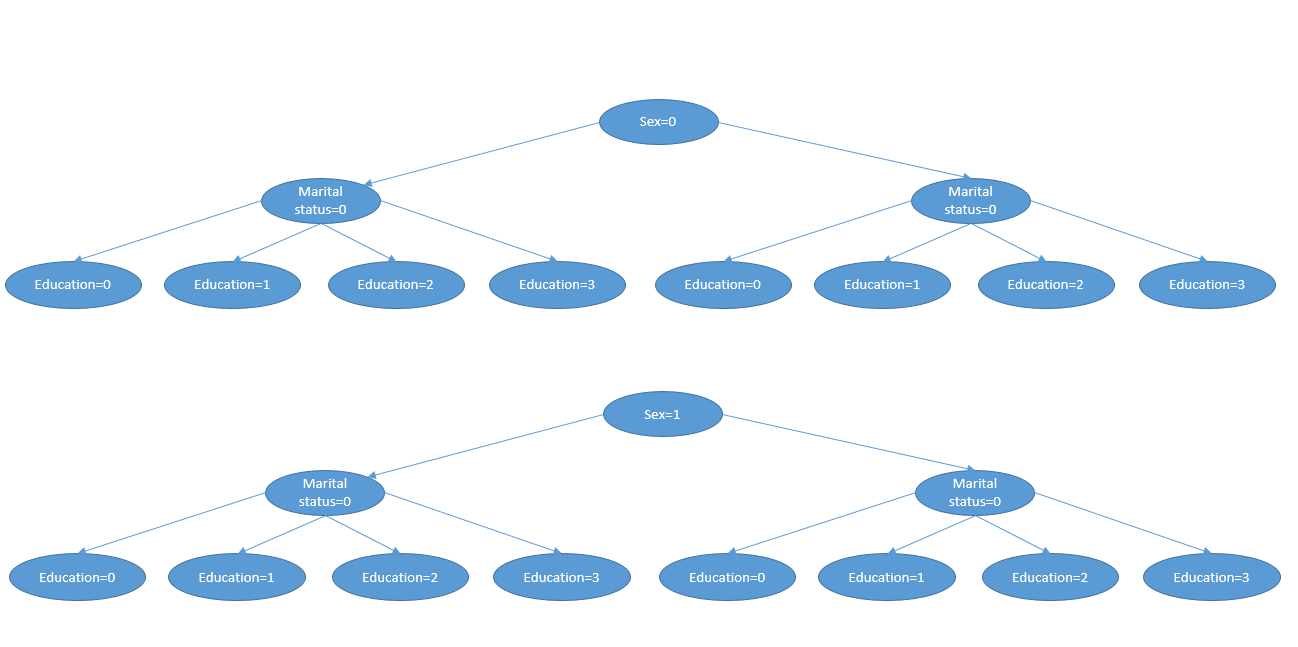

Solo con estas tres variables ya tendríamos 16 clústeres más los que después, en cada una de las ramas, nos dieran las variables numéricas. Es por este motivo por el que se prefiere llegar a una solución de compromiso metiendo las categóricas dentro de la clusterización.

Existen algoritmos como el kmodes que están pensados para el tratamiento de categóricas que, en lugar de la media, se basa en la moda y en vez de la distancia eculídea, utilizan medidas de disimilitud. Da buenos resultados, pero no permite meter variables numéricas.

También existe el algoritmo kprotypes que sí permite combinar ambas, numéricas y categóricas, pero es muy lento al procesarse.



# <center>FIN DE LA PRÁCTICA</center>

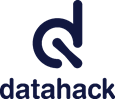